In [63]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import pandas as pd

In [65]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [67]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [68]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [69]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [70]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [71]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [72]:
engine.table_names()

['measurement', 'station']

In [73]:
df1 = pd.read_sql_query('SELECT * FROM measurement', con = engine)
df1.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [74]:
df3 = pd.read_sql_query('SELECT m.date, SUM(m.prcp) as Total_prcp FROM measurement as m GROUP BY m.date ORDER BY m.date',con = engine)
df4 = df3.set_index('date').T.to_dict('list')
df4

{'2010-01-01': [1.06],
 '2010-01-02': [0.02],
 '2010-01-03': [0.0],
 '2010-01-04': [0.01],
 '2010-01-05': [0.03],
 '2010-01-06': [0.5800000000000001],
 '2010-01-07': [1.65],
 '2010-01-08': [0.06],
 '2010-01-09': [0.02],
 '2010-01-10': [0.02],
 '2010-01-11': [0.8800000000000001],
 '2010-01-12': [0.02],
 '2010-01-13': [0.02],
 '2010-01-14': [0.0],
 '2010-01-15': [0.0],
 '2010-01-16': [0.0],
 '2010-01-17': [0.0],
 '2010-01-18': [0.0],
 '2010-01-19': [0.0],
 '2010-01-20': [0.01],
 '2010-01-21': [0.65],
 '2010-01-22': [0.0],
 '2010-01-23': [0.0],
 '2010-01-24': [0.02],
 '2010-01-25': [0.0],
 '2010-01-26': [0.25],
 '2010-01-27': [1.6],
 '2010-01-28': [0.73],
 '2010-01-29': [2.19],
 '2010-01-30': [7.3500000000000005],
 '2010-01-31': [2.16],
 '2010-02-01': [0.05],
 '2010-02-02': [0.05],
 '2010-02-03': [3.21],
 '2010-02-04': [0.02],
 '2010-02-05': [0.16],
 '2010-02-06': [0.12],
 '2010-02-07': [0.01],
 '2010-02-08': [0.0],
 '2010-02-09': [0.0],
 '2010-02-10': [0.0],
 '2010-02-11': [0.0],
 '2010-

In [75]:
pd.read_sql_query('SELECT * FROM station', con = engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [76]:
df10 = pd.read_sql_query('SELECT date, tobs FROM measurement', con = engine)
last_date = pd.to_datetime(df10.iloc[-1, 0])
date = last_date - relativedelta(years=1)
x = str(date)
y = x.split(' ')
df11 = pd.read_sql_query(f'SELECT m.date, m.tobs From measurement as m WHERE m.date >= "{y[0]}"', con = engine)
df11.head()

,date,tobs
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0


In [77]:
df11.set_index('date').T.to_dict('list')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


{'2016-08-23': [74.0],
 '2016-08-24': [74.0],
 '2016-08-25': [77.0],
 '2016-08-26': [80.0],
 '2016-08-27': [74.0],
 '2016-08-28': [71.0],
 '2016-08-29': [78.0],
 '2016-08-30': [75.0],
 '2016-08-31': [76.0],
 '2016-09-01': [77.0],
 '2016-09-02': [75.0],
 '2016-09-03': [75.0],
 '2016-09-04': [73.0],
 '2016-09-05': [76.0],
 '2016-09-06': [73.0],
 '2016-09-07': [74.0],
 '2016-09-08': [74.0],
 '2016-09-09': [75.0],
 '2016-09-10': [75.0],
 '2016-09-11': [71.0],
 '2016-09-12': [72.0],
 '2016-09-13': [75.0],
 '2016-09-14': [73.0],
 '2016-09-15': [73.0],
 '2016-09-16': [73.0],
 '2016-09-17': [76.0],
 '2016-09-18': [75.0],
 '2016-09-19': [70.0],
 '2016-09-20': [70.0],
 '2016-09-21': [73.0],
 '2016-09-22': [73.0],
 '2016-09-23': [73.0],
 '2016-09-24': [77.0],
 '2016-09-25': [76.0],
 '2016-09-26': [74.0],
 '2016-09-27': [74.0],
 '2016-09-28': [77.0],
 '2016-09-29': [77.0],
 '2016-09-30': [73.0],
 '2016-10-01': [74.0],
 '2016-10-02': [73.0],
 '2016-10-03': [76.0],
 '2016-10-04': [74.0],
 '2016-10-0

In [78]:
pd.read_sql_query('SELECT date, prcp FROM measurement WHERE date >= "2010-01-01" AND date <= "2010-12-31"', con = engine).head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [79]:
last = pd.read_sql_query('SELECT MAX(date) as "Max Date" FROM measurement', con = engine).iloc[0,0]
last_date = dt.datetime.strptime(last, '%Y-%m-%d')
last_year = last_date - relativedelta(years=1)
print(str(last_year))

2016-08-23 00:00:00


In [80]:
precip_df = pd.read_sql_query('SELECT date, prcp FROM measurement', con = engine)
precip_df = precip_df.dropna()
#precip_df.dtypes
precip_df['date'] = pd.to_datetime(precip_df['date'])
precip_df = precip_df.set_index('date')

In [81]:
precip_df = precip_df.sort_index()
precip_df.head()

,prcp
date,
2010-01-01,0.08
2010-01-01,0.15
2010-01-01,0.28
2010-01-01,0.05
2010-01-01,0.14


In [82]:
precip_y = precip_df.sum(level = 'date')
precip_y.head()
precip_y['prcp'].max()

37.41

In [83]:
precip_df['prcp'].max()

11.53

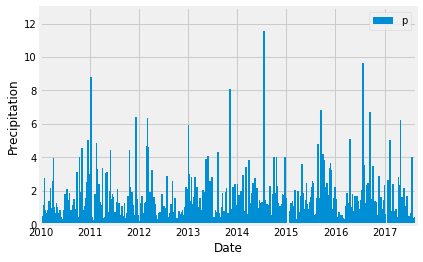

In [146]:
plt.bar(precip_df.index, precip_df['prcp'], width = 12)
plt.axis([min(precip_df.index), max(precip_df.index), min(precip_df['prcp']), 13])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend('precipitation')
plt.show()

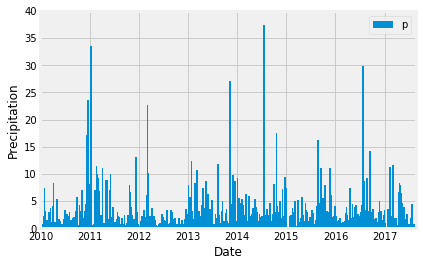

In [145]:
plt.bar(precip_y.index, precip_y['prcp'], width = 12)
plt.axis([min(precip_y.index), max(precip_y.index), min(precip_y['prcp']), 40])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend('precipitation')
plt.show()

In [84]:
precip_summary2 = pd.DataFrame(precip_df['prcp'].describe( percentiles = [ 0.25, 0.5, 0.75 ] ))
precip_summary2

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [85]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [86]:
# Design a query to show how many stations are available in this dataset?
pd.read_sql_query('SELECT COUNT (DISTINCT station) From station', con = engine)

,COUNT (DISTINCT station)
0,9


In [87]:
pd.read_sql_query('SELECT m.station, count(*) as count FROM measurement as m GROUP BY m.station ORDER BY count DESC', con = engine)

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [88]:
pd.read_sql_query('SELECT MIN(m.tobs) as Min, MAX(m.tobs) as Max, AVG(m.tobs) as Avg FROM measurement as m', con=engine).T.rename(columns = {0: 'tobs'})

,tobs
Min,53.000000
Max,87.000000
Avg,73.097954


In [89]:
temp_df = pd.read_sql_query('SELECT m.station, m.tobs FROM measurement as m WHERE m.station = "USC00519281"', con = engine)
temp_df.head()

,station,tobs
0,USC00519281,70.0
1,USC00519281,62.0
2,USC00519281,74.0
3,USC00519281,75.0
4,USC00519281,74.0


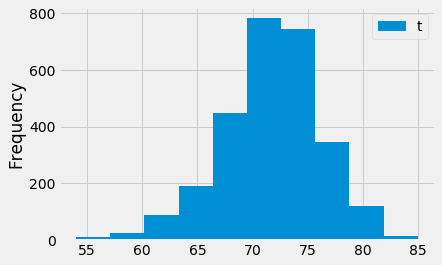

In [90]:
plt.hist(temp_df['tobs'])
plt.ylabel('Frequency')
plt.legend('tobs')
plt.show()

In [92]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [93]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))
print(calc_temps('2011-02-28', '2011-03-05')[0][1])

[(61.0, 69.75510204081633, 75.0)]
69.75510204081633


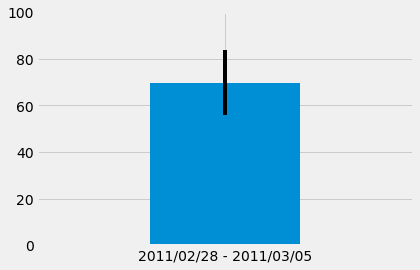

In [94]:
plt.bar('2011/02/28 - 2011/03/05', calc_temps('2011-02-28', '2011-03-05')[0][1], yerr = calc_temps('2011-02-28', '2011-03-05')[0][0]-calc_temps('2011-02-28', '2011-03-05')[0][2])
plt.axis([-1, 1, 0, 100])
plt.show()

In [95]:
pd.read_sql_query('SELECT s.station, s.name, SUM(m.prcp) as Total_prcp, s.latitude, s.longitude, s.elevation FROM measurement as m, station as s WHERE m.station = s.station GROUP BY s.station ORDER BY Total_prcp DESC', con = engine)

,station,name,Total_prcp,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",1068.09,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",588.64,21.45167,-157.84889,32.9
2,USC00513117,"KANEOHE 838.1, HI US",382.62,21.42340,-157.80150,14.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",295.68,21.33556,-157.71139,19.5
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",234.49,21.52130,-157.83740,7.0
5,USC00519397,"WAIKIKI 717.2, HI US",131.62,21.27160,-157.81680,3.0
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",92.68,21.31520,-157.99920,0.9
7,USC00518838,"UPPER WAHIAWA 874.3, HI US",70.87,21.49920,-158.01110,306.6
8,USC00517948,"PEARL CITY, HI US",43.44,21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


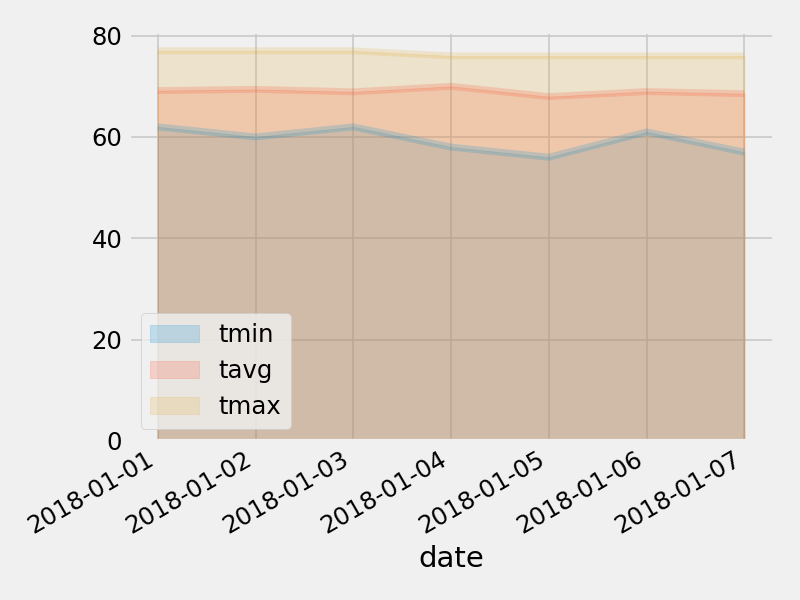

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
